In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


<Axes: ylabel='Age'>

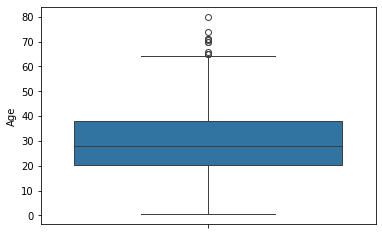

In [4]:
sns.boxplot(df['Age'])

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Pclass', ylabel='Age'>

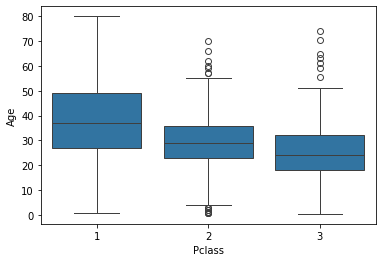

In [6]:
sns.boxplot(data = df, x = 'Pclass', y = 'Age')

In [7]:
print(df[df['Pclass'] == 1]['Age'].median())
print(df[df['Pclass'] == 2]['Age'].median())
print(df[df['Pclass'] == 3]['Age'].median())

37.0
29.0
24.0


In [8]:
for index, valor in df.iterrows():
    if pd.isnull(valor['Age']):
        if valor['Pclass'] == 1:
            df.at[index, 'Age'] = 37
        elif valor['Pclass'] == 2:
            df.at[index, 'Age'] = 29
        else:
            df.at[index, 'Age'] = 24

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
Q1 = np.percentile(df['Age'], q=25)
Q2 = np.percentile(df['Age'], q=75)
IRQ = Q2 - Q1
limite_inferior = Q1 - (1.5 * IRQ)
limite_superior = Q2 + (1.5 * IRQ)

In [11]:
df_limpo = df[(df['Age'] >= limite_inferior) & (df['Age'] <= limite_superior)]

<Axes: ylabel='Age'>

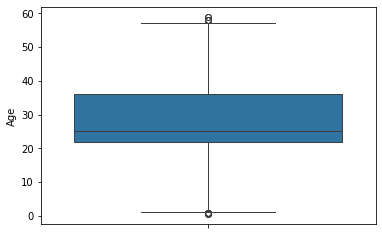

In [12]:
sns.boxplot(data = df_limpo, y = 'Age')

In [13]:
df_limpo.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          674
Embarked         1
dtype: int64

# Medidas de Tendencia Central:

In [14]:
media = df_limpo['Age'].mean()
print('Media', media)

mediana = df_limpo['Age'].median() 
print('Mediana', mediana)

moda = df_limpo['Age'].mode()
print('Moda', moda)

quantil = df_limpo['Age'].quantile(q=0.50)
print('Quantil', quantil)

Media 27.98343352601156
Mediana 25.0
Moda 0    24.0
Name: Age, dtype: float64
Quantil 25.0


# Medidas de Dispersao

In [15]:
amplitude = df_limpo['Age'].max() - df_limpo['Age'].min()
print(amplitude)

variancia = df_limpo['Age'].var()
print(variancia)

desvio_padrao = df_limpo['Age'].std()
print(desvio_padrao)

# Desvio absoluto: distancia de cada ponto da media, abs() para ser o valor absoluto aos desvios e a media desses desvios
desvio_absoluto = (df_limpo['Age'] - df_limpo['Age'].mean()).abs().mean()
print(desvio_absoluto)

58.58
139.70192951669878
11.819557077856123
9.125997821510909


# Medidas de Associacao

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df_limpo_quanti = df.drop(columns=['PassengerId']).select_dtypes(include='number')

In [18]:
df_limpo_quanti.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [19]:
covariancia = df_limpo_quanti.cov()
print(covariancia)

correlacao = df_limpo_quanti.corr()
print(correlacao)

          Survived     Pclass         Age     SibSp     Parch         Fare
Survived  0.236772  -0.137703   -0.304541 -0.018954  0.032017     6.221787
Pclass   -0.137703   0.699015   -4.523328  0.076599  0.012429   -22.830196
Age      -0.304541  -4.523328  175.417624 -3.556771 -1.826583    81.470262
SibSp    -0.018954   0.076599   -3.556771  1.216043  0.368739     8.748734
Parch     0.032017   0.012429   -1.826583  0.368739  0.649728     8.661052
Fare      6.221787 -22.830196   81.470262  8.748734  8.661052  2469.436846
          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.047255 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.408487  0.083081  0.018443 -0.549500
Age      -0.047255 -0.408487  1.000000 -0.243526 -0.171095  0.123784
SibSp    -0.035322  0.083081 -0.243526  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.171095  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.123784  0.159651  0.216225  1

# Medidas de Forma

## Assimetria

In [20]:
# Funcao .skew() calcula o skewness de forma automatica

assimetria = df_limpo_quanti.skew()
print(assimetria)

Survived    0.478523
Pclass     -0.630548
Age         0.548256
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64


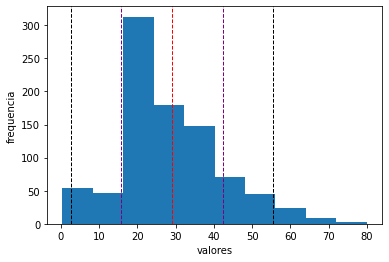

In [21]:
media_age = df_limpo_quanti['Age'].mean()
desvio_pad_age = df_limpo_quanti['Age'].std(ddof=1)

plt.figure()
plt.hist(df_limpo_quanti['Age'])
plt.xlabel('valores')
plt.ylabel('frequencia')

plt.axvline(media_age, color='r', linestyle='dashed', linewidth=1)
plt.axvline(media_age+desvio_pad_age, color='purple', linestyle='dashed', linewidth=1)
plt.axvline(media_age-desvio_pad_age, color='purple', linestyle='dashed', linewidth=1)
plt.axvline(media_age+2*desvio_pad_age, color='black', linestyle='dashed', linewidth=1)
plt.axvline(media_age-2*desvio_pad_age, color='black', linestyle='dashed', linewidth=1)

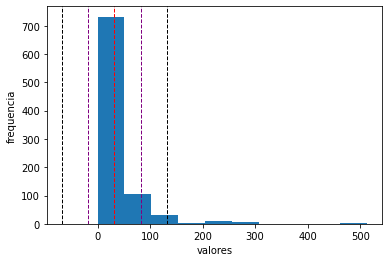

In [22]:
c = df_limpo_quanti['Fare'].size
media_fare = df_limpo_quanti['Fare'].mean()
desvio_pad_fare = df_limpo_quanti['Fare'].std(ddof=1)

plt.figure()
plt.hist(df_limpo_quanti['Fare'])
plt.xlabel('valores')
plt.ylabel('frequencia')
plt.axvline(media_fare, color='r', linestyle='dashed', linewidth=1)
plt.axvline(media_fare+desvio_pad_fare, color='purple', linestyle='dashed', linewidth=1)
plt.axvline(media_fare-desvio_pad_fare, color='purple', linestyle='dashed', linewidth=1)
plt.axvline(media_fare+2*desvio_pad_fare, color='black', linestyle='dashed', linewidth=1)
plt.axvline(media_fare-2*desvio_pad_fare, color='black', linestyle='dashed', linewidth=1)

## Curtose

In [23]:
# A biblioteca Pandas possui duas funcoes de curtose: kurt(Pandas Series) e kurtosis(DataFrames)

curtose = df_limpo_quanti.kurt()
print(curtose)

Survived    -1.775005
Pclass      -1.280015
Age          0.782790
SibSp       17.880420
Parch        9.778125
Fare        33.398141
dtype: float64


Text(0.5, 0, 'Idade')

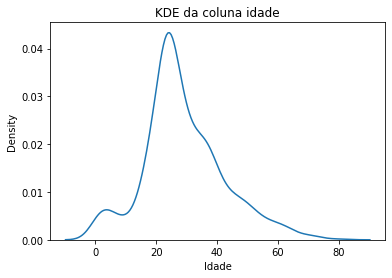

In [24]:
# Grafico de estimativa de densidade de Kernel (KDE) > Melhor forma para visualizar a assimetria e curtose

sns.kdeplot(df_limpo_quanti['Age'])
plt.title('KDE da coluna idade')
plt.xlabel('Idade')

Text(0.5, 0, 'Fare')

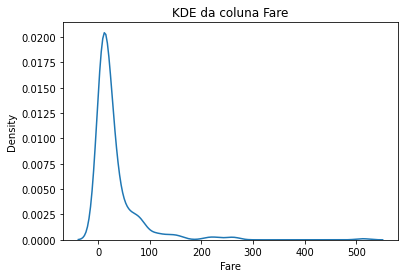

In [25]:
sns.kdeplot(df_limpo_quanti['Fare'])
plt.title('KDE da coluna Fare')
plt.xlabel('Fare')

<Axes: xlabel='Age', ylabel='Count'>

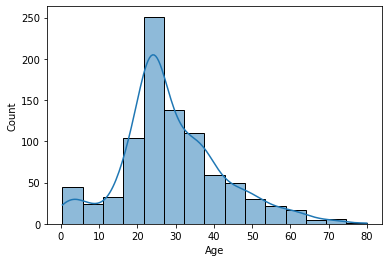

In [26]:
sns.histplot(df_limpo_quanti['Age'], bins=15, kde=True)

<Axes: xlabel='Fare', ylabel='Count'>

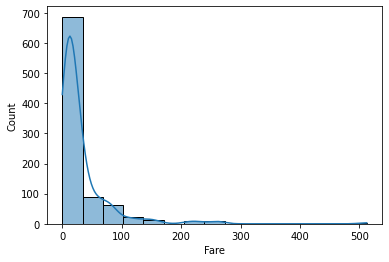

In [27]:
sns.histplot(df_limpo_quanti['Fare'], bins=15, kde=True)